
##**A Brief About the Olympic Games:**

**Olympics** is one of the biggest sporting events featuring summer and winter sports competitions where thousands of athletes from around the world participate in a variety of competitions. 
More than **200** nations participate.The Olympic Games are usually held every four years, alternating between the Summer and Winter Olympics every two years in the four-year period. The International Olympic Committee (IOC) as formed in **1894** and the first modern Olympics was held in **1896**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load Data

athletes = pd.read_csv('/content/athlete_events.csv')
regions = pd.read_csv('/content/noc_regions.csv')

In [5]:
athletes.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [6]:
regions.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [7]:
# join dataframes

athletes_df = athletes.merge(regions, how='left', on='NOC')
athletes_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [8]:
athletes_df.shape

(271116, 17)

In [10]:
#columns nameds consistent

athletes_df.rename(columns={'region' : 'Region', 'notes' : 'Notes'}, inplace=True)

In [11]:
athletes_df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [63]:
athletes_df.info

<bound method DataFrame.info of             ID                      Name Sex  ...  Medal       Region  Notes
0            1                 A Dijiang   M  ...    NaN        China    NaN
1            2                  A Lamusi   M  ...    NaN        China    NaN
2            3       Gunnar Nielsen Aaby   M  ...    NaN      Denmark    NaN
3            4      Edgar Lindenau Aabye   M  ...   Gold      Denmark    NaN
4            5  Christine Jacoba Aaftink   F  ...    NaN  Netherlands    NaN
...        ...                       ...  ..  ...    ...          ...    ...
271111  135569                Andrzej ya   M  ...    NaN       Poland    NaN
271112  135570                  Piotr ya   M  ...    NaN       Poland    NaN
271113  135570                  Piotr ya   M  ...    NaN       Poland    NaN
271114  135571        Tomasz Ireneusz ya   M  ...    NaN       Poland    NaN
271115  135571        Tomasz Ireneusz ya   M  ...    NaN       Poland    NaN

[271116 rows x 17 columns]>

In [15]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Some Notacible notes:

* First Olympic is equal to minimum year column value which is **1896** and last year in this dataset **2016**.
* In Age column we see that the youngest participant in the Olympics was **10** years and the oldest was at **97** year old.

In [25]:
# Columns with null values

i_null=athletes_df.isna().any(axis=0).to_frame()
i_null

,0
ID,False
Name,False
Sex,False
Age,True
Height,True
Weight,True
Team,False
NOC,False
Games,False
Year,False


In [28]:
null_sum = athletes_df.isnull().sum()
null_sum.to_frame()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


So basiclly we have null values in Age, Height, weight and Region columns also of Course in **Medal** column Sinc the Majority of participant don't win any Medals.

In [34]:
# Germany details
athletes_df.query('Team == "Germany"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
261,133,Franz Abb,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Germany,NaN
669,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany,NaN
670,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany,NaN
687,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Germany,NaN
688,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN,Germany,NaN


In [35]:
# Syria details
athletes_df.query('Team == "Syria"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
510,284,Anouar Abdul Kader,M,27.0,NaN,NaN,Syria,SYR,1980 Summer,1980,Summer,Moskva,Football,Football Men's Football,NaN,Syria,NaN
838,479,Zaid Abou Hamed,M,30.0,182.0,79.0,Syria,SYR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's 400 metres Hurdles,NaN,Syria,NaN
1222,688,Said Achtar,M,23.0,NaN,NaN,Syria,SYR,1980 Summer,1980,Summer,Moskva,Judo,Judo Men's Open Class,NaN,Syria,NaN
1784,987,Khadour Adnan,M,25.0,173.0,81.0,Syria,SYR,1996 Summer,1996,Summer,Atlanta,Boxing,Boxing Men's Light-Heavyweight,NaN,Syria,NaN
2803,1557,Naasan Ajjoub,M,19.0,172.0,91.0,Syria,SYR,1980 Summer,1980,Summer,Moskva,Boxing,Boxing Men's Heavyweight,NaN,Syria,NaN


In [43]:
# Top ten Cpuntries Participating

Top10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
Top10_countries.to_frame()

,Team
United States,17847
France,11988
Great Britain,11404
Italy,10260
Germany,9326
Canada,9279
Japan,8289
Sweden,8052
Australia,7513
Hungary,6547


Cool! **Germany** is number **Five**

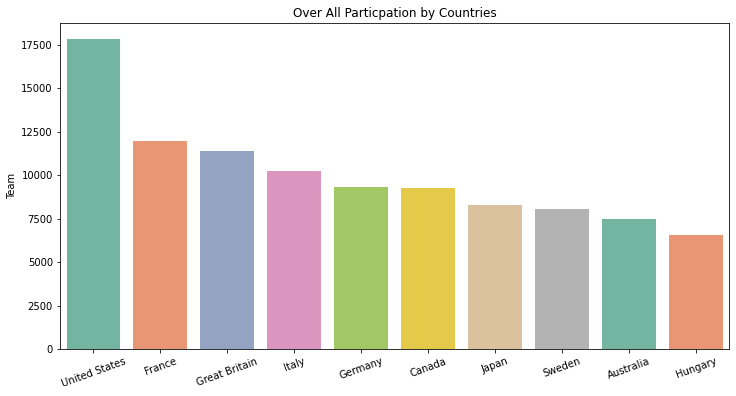

In [57]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=20)
plt.title('Over All Particpation by Countries')
sns.barplot(x=Top10_countries.index, y=Top10_countries, palette= 'Set2');

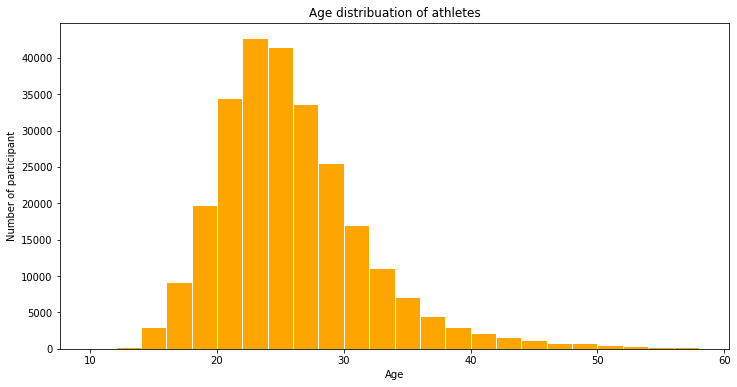

In [61]:
plt.figure(figsize=(12,6))
plt.title('Age distribuation of athletes')
plt.xlabel('Age')
plt.ylabel('Number of participant')
plt.hist(x=athletes_df.Age, bins=np.arange(10, 60, 2), color='orange', edgecolor='white');

Most athletes age are between **20 to 30** years old

In [68]:
# what are winter Sports?

winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [69]:
# what are Summer Sports?

summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [70]:
# Male and Female Partisipants

gender_counts = athletes_df.Sex.value_counts()
gender_counts.to_frame()

,Sex
M,196594
F,74522


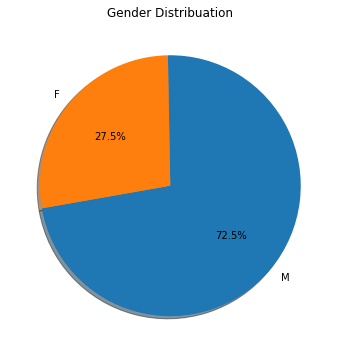

In [75]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribuation')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=190, shadow=True);

In [79]:
# Total Medal

Medal_count = athletes_df.Medal.value_counts()
Medal_count.to_frame()

,Medal
Gold,13372
Bronze,13295
Silver,13116


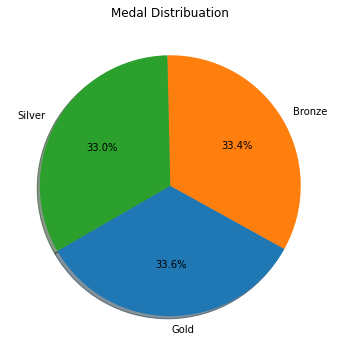

In [82]:
plt.figure(figsize=(12,6))
plt.title('Medal Distribuation')
plt.pie(Medal_count, labels=Medal_count.index, autopct='%1.1f%%', startangle=210, shadow=True);

In [89]:
# Total number of Female partisipanrt in each Olympics

female_participant = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')][['Sex', 'Year']]
female_participant = female_participant.groupby('Year').count().reset_index()
female_participant.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [90]:
women_olympics = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')]

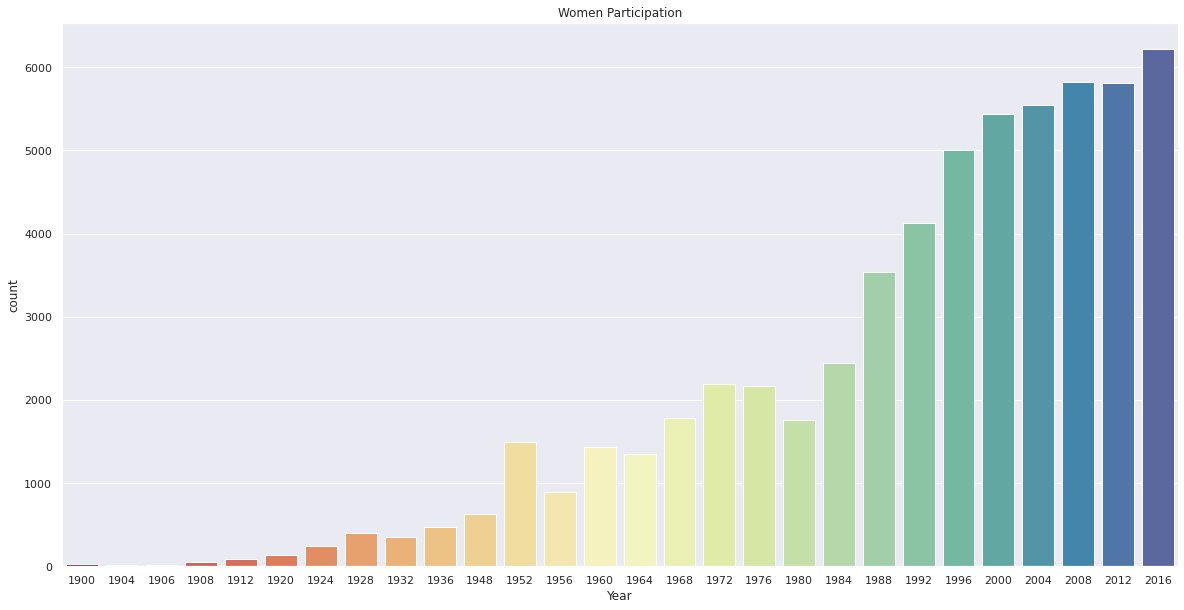

In [102]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=women_olympics, palette='Spectral')
plt.title('Women Participation');

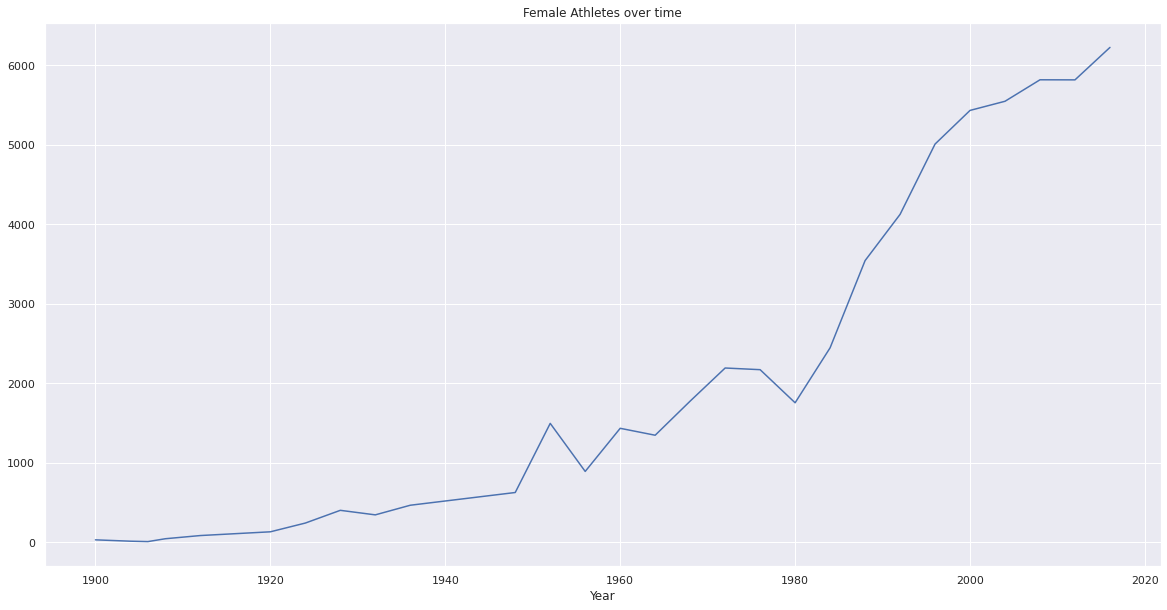

In [105]:
part = women_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Female Athletes over time');

We Notice significtin decreasing in Female participating number in years **1956** and **1980** ??

In [106]:
# Gold Medal

Gold_Medals = athletes_df[(athletes_df.Medal == 'Gold')]
Gold_Medals.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN


In [108]:
# Take only the values that are differnet from NaN

Gold_Medals = Gold_Medals[np.isfinite(Gold_Medals['Age'])]

In [109]:
# Gold beyond 60 age

Gold_Medals['ID'][Gold_Medals['Age'] > 60].count()

6

**6 athletes** who's age is greater than **60** years old had a Golden Medle, Nothing is impossible :) 

In [119]:
sport_Events = Gold_Medals['Sport'][Gold_Medals['Age']> 60]
sport_Events.to_frame()

,Sport
104003,Art Competitions
105199,Roque
190952,Archery
226374,Archery
233390,Shooting
261102,Archery


In [124]:
# Gold Medal for each Country

Gold_Medals.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Super Cool! **Germany is the Third** 

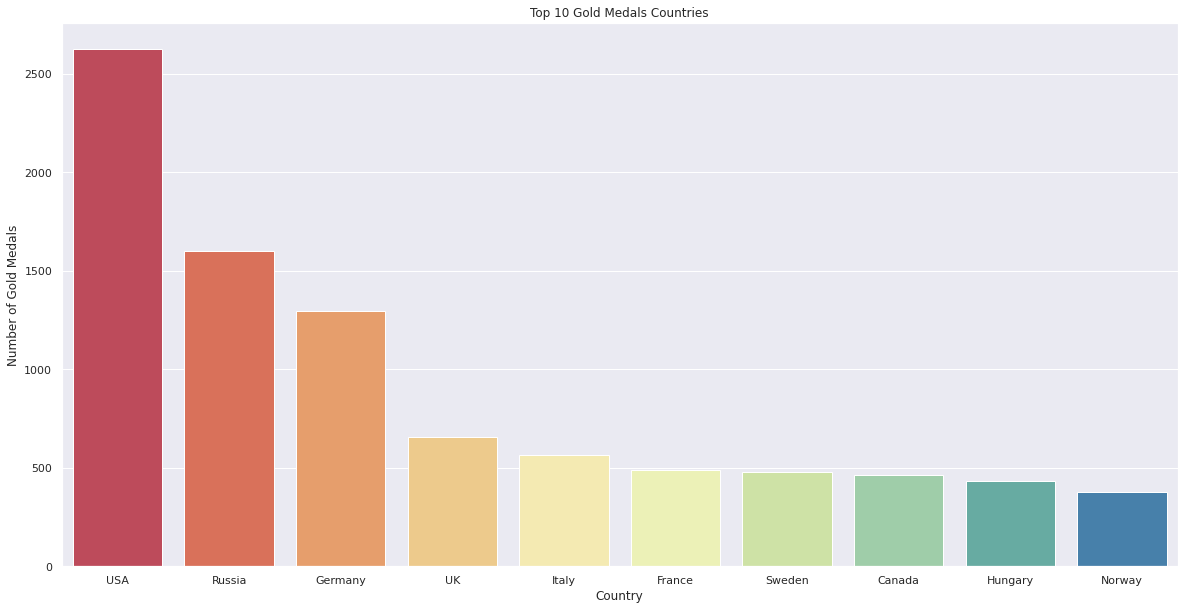

In [136]:
Top10_Medals = Gold_Medals.Region.value_counts().reset_index(name='Medal').head(10)
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.barplot(x='index', y='Medal', data=Top10_Medals, palette='Spectral')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.title('Top 10 Gold Medals Countries');

In [155]:
# A clean dataframe whthout Null values in Height and Weight

not_null_medals = athletes_df[(athletes_df['Height'].notnull() & athletes_df['Weight'].notnull())]

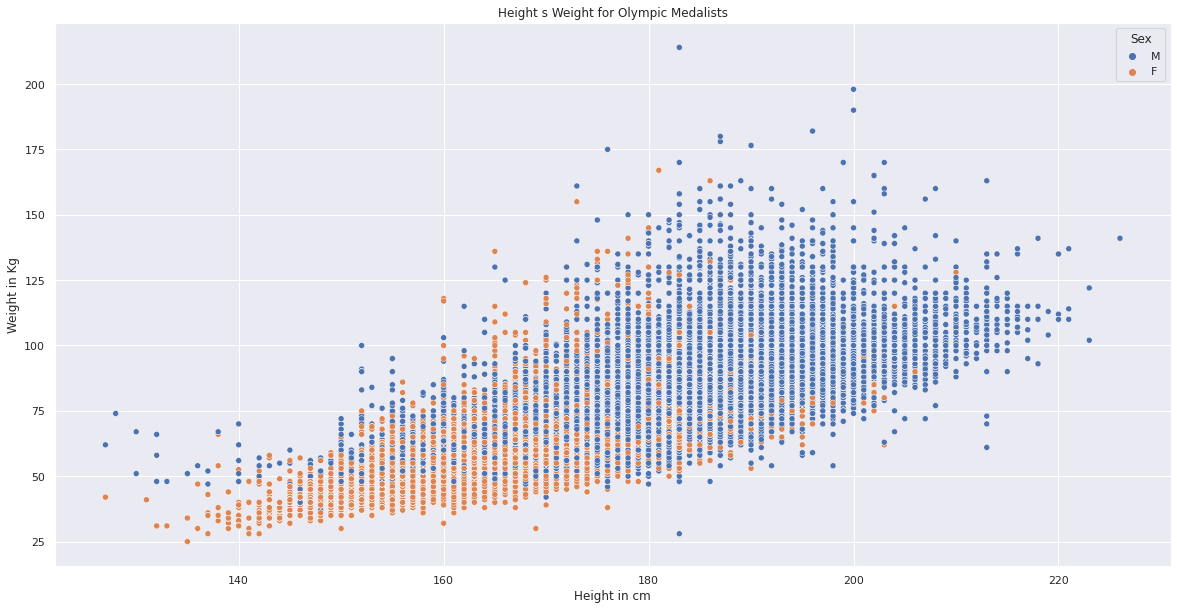

In [157]:
# A scatterplot for the clean datafram

plt.figure(figsize=(20,10))
axis = sns.scatterplot(x="Height", y="Weight", data=not_null_medals, hue='Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in Kg')
plt.title('Height s Weight for Olympic Medalists');